In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Load Datasets</h1>

In [3]:
# train dataset
df = pd.read_csv("FMCG_data.csv")

# test dataset
df_test = pd.read_csv("FMCG_data.csv")

In [ ]:
df.drop(columns=['wh_est_year'], inplace = True

In [ ]:
df_test

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Exploration</h1>

In [ ]:
df.columns

In [ ]:
# display first 5 rows from train data

df.head().T

In [ ]:
# shape and size of train data

print("Shape : ", df.shape)
print("Size : ", df.size)

In [ ]:
# shape and size of test data

print("Shape : ", df_test.shape)
print("Size : ", df_test.size)

In [ ]:
#display all columns

print(df.columns)
print(' ')
print("Total columns in train dataset = ", len(df.columns))
print("Total columns in test dataset = ", len(df_test.columns))

In [ ]:
df.info()

In [ ]:
df_test.info()

In [ ]:
df_test

In [ ]:
df.dtypes.value_counts()

In [ ]:
# display two sample rows of columns with int dtype

df.select_dtypes(include='int64').sample(2).T

In [ ]:
# display two sample rows of columns with object dtype

df.select_dtypes(include='object').sample(2).T

In [ ]:
# display two sample rows of columns with float dtype

df.select_dtypes(include='float64').sample(2).T

In [ ]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

In [ ]:
df.describe().round(2)

In [ ]:
df

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Cleaning</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Train Data</h1>

In [4]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

product_wg_ton                  53324
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  8081
dist_from_hub                     217
workers_num                       115
Number_of_distributors            113
storage_issue_reported             64
govt_check                         59
wh_breakdown                       36
wh_est_year                        28
Refill_Requests                    22
No_of_Competitor                   20
transport_issue                    17
Date                                9
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
electric_supply                     2
flood_proof                         2
Location_type                       2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
dtype: int64

In [5]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','Date'], inplace = True)

In [ ]:
df

In [ ]:
print(len(df[df.duplicated]))

In [ ]:
# Missing values
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [ ]:
# print percentage of null values in each column

null_values_features = [i for i in df.columns if df[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df[i].isnull().mean()*100, 2), "% missing values")

In [6]:
# wh_est_year 

df.drop(columns=['wh_est_year'], inplace = True)

In [7]:
plt.figure(figsize=(6, 4))
sns.distplot(df['workers_num'], hist=False, kde=True, color='purple')
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [8]:
df['workers_num'].median()

33.0

In [9]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [10]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
Refill_Requests                   0
transport_issue                   0
No_of_Competitor                  0
No_of_retailers                   0
Warehouse_Ownership               0
Number_of_distributors            0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported            0
temp_reg_mach                     0
approved_wh_govt_certificate      0
wh_breakdown                      1
govt_check                        1
product_wg_ton                    1
dtype: int64

In [12]:
# outliers

In [13]:
df.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
WH_capacity_size                    3
zone                                4
approved_wh_govt_certificate        5
WH_regional_zone                    6
transport_issue                    17
No_of_Competitor                   20
Refill_Requests                    22
wh_breakdown                       36
govt_check                         59
storage_issue_reported             64
Number_of_distributors            113
workers_num                       115
dist_from_hub                     217
No_of_retailers                  8081
product_wg_ton                  53324
dtype: int64

In [14]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    200537
Urban     17856
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    88795
Mid      87550
Small    42048
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    89751
West     69323
South    55571
East      3748
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    118604
Rented            99789
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    196960
1     21433
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    206440
1     11953
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    143446
0     74947
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 2
temp_reg_mach
0

In [15]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5.0,15.0,17115.0
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3.0,17.0,5074.0
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6.0,22.0,23137.0
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3.0,27.0,22115.0
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6.0,24.0,24071.0


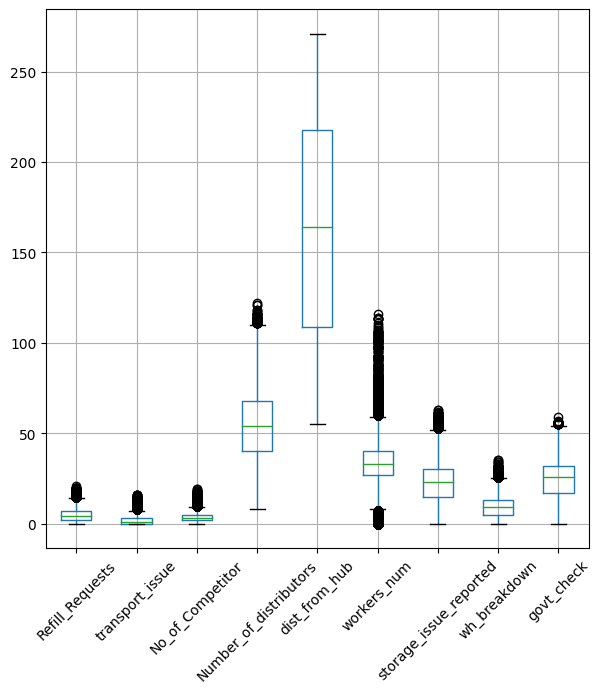

In [16]:
num_columns = df.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'No_of_retailers'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(7,7))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

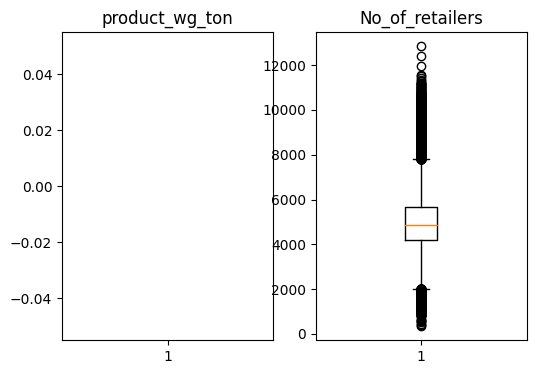

In [18]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df.No_of_retailers)
plt.title('No_of_retailers')

plt.show()

In [ ]:
df

In [19]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [20]:
outlier_counts = count_outliers(df)
outlier_counts

{'Refill_Requests': 828,
 'transport_issue': 4548,
 'No_of_Competitor': 4833,
 'No_of_retailers': 5595,
 'Number_of_distributors': 64,
 'flood_impacted': 21433,
 'flood_proof': 11953,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 7355,
 'storage_issue_reported': 477,
 'temp_reg_mach': 0,
 'wh_breakdown': 680,
 'govt_check': 22,
 'product_wg_ton': 770}

In [21]:
df['product_wg_ton'].corr(df['flood_proof'])

-0.0011879347800466825

In [22]:
df['product_wg_ton'].corr(df['flood_impacted'])

-0.0033720694217116236

In [23]:
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [24]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [25]:
df = remove_outliers(df)
df.shape

(193805, 19)

In [ ]:
df

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Test Data</h1>

In [26]:
# display number of unique values in each column

df_test.nunique().sort_values(ascending=False)

product_wg_ton                  53324
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  8081
dist_from_hub                     217
workers_num                       115
Number_of_distributors            113
storage_issue_reported             64
govt_check                         59
wh_breakdown                       36
wh_est_year                        28
Refill_Requests                    22
No_of_Competitor                   20
transport_issue                    17
Date                                9
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
electric_supply                     2
flood_proof                         2
Location_type                       2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
dtype: int64

In [27]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [28]:
print(len(df_test[df_test.duplicated]))

0


In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [30]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.45 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values


In [31]:
# wh_est_year 

df_test.drop(columns=['wh_est_year'], inplace = True)

In [32]:
plt.figure(figsize=(6, 4))
sns.distplot(df_test['workers_num'], hist=False, kde=True, color='purple')
plt.show()

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [33]:
df_test['workers_num'].median()

33.0

In [34]:
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)

In [35]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [36]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [37]:
df_test.isnull().sum()

Date                            0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
Refill_Requests                 0
transport_issue                 0
No_of_Competitor                0
No_of_retailers                 0
Warehouse_Ownership             0
Number_of_distributors          0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported          0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown                    1
govt_check                      1
product_wg_ton                  1
dtype: int64

In [38]:
# Outliers

In [39]:
df_test.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
Warehouse_Ownership                 2
flood_impacted                      2
flood_proof                         2
electric_supply                     2
WH_capacity_size                    3
zone                                4
approved_wh_govt_certificate        5
WH_regional_zone                    6
Date                                9
transport_issue                    17
No_of_Competitor                   20
Refill_Requests                    22
wh_breakdown                       36
govt_check                         59
storage_issue_reported             64
Number_of_distributors            113
workers_num                       115
dist_from_hub                     217
No_of_retailers                  8081
product_wg_ton                  53324
dtype: int64

In [40]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    200537
Urban     17856
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    88795
Mid      87550
Small    42048
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    89751
West     69323
South    55571
East      3748
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    118604
Rented            99789
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    196960
1     21433
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    206440
1     11953
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    143446
0     74947
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 2
temp_reg_mach
0

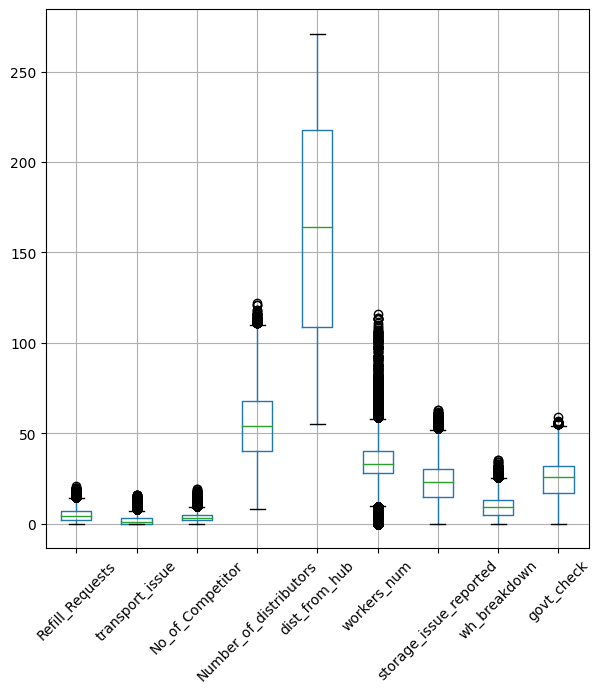

In [41]:
num_columns = df_test.select_dtypes(include=['int', 'float'])
num_columns.drop(columns=['product_wg_ton', 'No_of_retailers'], inplace=True)
num_columns.drop(columns=num_columns.columns[num_columns.nunique()<=4], inplace=True)
plt.figure(figsize=(7,7))
num_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

In [42]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,1,91,29.0,13,0,A,5.0,15.0,17115.0
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,1,210,31.0,4,0,A,3.0,17.0,5074.0
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,161,37.0,17,0,A,6.0,22.0,23137.0
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,103,21.0,17,1,A+,3.0,27.0,22115.0
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,112,25.0,18,0,C,6.0,24.0,24071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218386,Rural,Mid,North,Zone 4,2,2,0,7495,Company Owned,39,1,177,51.0,34,0,B,15.0,38.0,32168.0
218388,Rural,Large,North,Zone 6,4,0,3,3900,Company Owned,70,0,213,41.0,21,1,C,14.0,16.0,14496.0
218389,Rural,Large,West,Zone 6,1,0,0,6132,Company Owned,64,0,112,52.0,39,0,B,14.0,30.0,35508.0
218390,Rural,Mid,South,Zone 2,3,7,5,5381,Company Owned,35,1,225,36.0,8,0,B,20.0,42.0,17636.0


In [ ]:
plt.figure(figsize=(6, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))

plt.boxplot(df_test.product_wg_ton)
plt.title('product_wg_ton')

ax2 = plt.subplot2grid((1, 2), (0, 1))

plt.boxplot(df_test.No_of_retailers)
plt.title('No_of_retailers')

plt.show()

In [43]:
def count_outliers(df_test):
    outliers={}
    for i in df_test.columns:
        if pd.api.types.is_numeric_dtype(df_test[i]):
            q1 = df_test[i].quantile(0.25)
            q3 = df_test[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df_test[(df_test[i] < lower) | (df_test[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [44]:
outlier_counts = count_outliers(df_test)
outlier_counts

{'Refill_Requests': 828,
 'transport_issue': 4548,
 'No_of_Competitor': 4833,
 'No_of_retailers': 5595,
 'Number_of_distributors': 64,
 'flood_impacted': 21433,
 'flood_proof': 11953,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8807,
 'storage_issue_reported': 477,
 'temp_reg_mach': 0,
 'wh_breakdown': 680,
 'govt_check': 22,
 'product_wg_ton': 770}

In [ ]:
df

In [45]:
df_test['product_wg_ton'].corr(df_test['storage_issue_reported'])

0.9040255358795516

In [46]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [47]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [48]:
df_test = remove_outliers(df_test)

In [49]:
df_test.shape

(193493, 20)

In [50]:
df_test.columns

Index(['Date', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Refill_Requests', 'transport_issue', 'No_of_Competitor',
       'No_of_retailers', 'Warehouse_Ownership', 'Number_of_distributors',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown', 'govt_check',
       'product_wg_ton'],
      dtype='object')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Analysis and Visualization</h1>

In [ ]:
plt.figure(figsize=(12, 7))


# Warehouse location type
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Location_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=20, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse location type', fontsize=10)



In [ ]:
#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('Location_type')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by Warehouse location type', fontsize=10)
plt.ylabel('Avg product weight')



In [ ]:
df

In [ ]:
# Warehouse Owner Type

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('Warehouse_Ownership')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['Warehouse_Ownership'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=180, ylabel=' ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Warehouse owner type', fontsize=10)



<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse location type & Owner Type</h1>

#### Location type
* Urban areas account for 8 % of the total, while rural areas make up the remaining 92 %.
* The average product weight in rural areas is higher than of urban areas.
* The total product weight in rural areas far exceeds that of urban areas.

#### Owner type
* The first graph illustrates the distribution of warehouse ownership, revealing that 46% of warehouses are rented, while 54% are owned by companies.
* The average product weight in both types of warehouses appears to be nearly identical.
* This data shows a slightly higher total product weight in company-owned warehouses despite their minority in distribution.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Electric_supply & temp_reg_mach availability</h1>

In [ ]:
plt.figure(figsize=(12, 7))


# Temperature regulating machine availability
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

print(df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['temp_reg_mach'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=20, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of temp_reg_mach availability', fontsize=10)



In [ ]:
#plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))

x = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightslategrey', width=0.08)
plt.title('Average product weight by temp_reg_mach availability', fontsize=10)
plt.ylabel('Avg product weight')

# Electric Supply Availability


In [ ]:

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))
print(df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

df['electric_supply'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'lightblue'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                     startangle=180, ylabel=' ', labels = ['Not Available (0)', 'Available (1)'])

plt.title('Distribution of Electric Supply Availability', fontsize=10)



In [ ]:
# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))

x = df.groupby('electric_supply')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='lightblue', width=0.08)
plt.title('Average product weight by Electric Supply Availability', fontsize=10)
plt.ylabel('Avg product weight')

plt.show()

#### Electric_supply
* 66% of the warehouses surveyed were found to be unavailable, while the remaining 34% were deemed accessible for electric supply.
* The average product weight in the electric supply not available warehouses was lower in comparison to those that were accessible for use.
* Among the available warehouses, total product weight amounted to 203,327,830 units, whereas the not available warehouses collectively held a total   product weight of 106,690,637 units.

#### Temp_reg_mach availability
* The data indicates that the availability of temperature regulating machines in warehouses is limited, with 66% of warehouses reporting unavailability, while only 34% have these machines accessible.
* Despite the lower availability, warehouses with temperature regulating machines available account for a total product weight of 101,599,625 units, compared to 208,418,842 units in warehouses where they are not available.
* The average product weight in warehouses without temperature regulating machines is lower than in those where they are available.

In [ ]:
df

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Storage issue reported in the last 3 months</h1>

In [ ]:
print("Unique values in Storage issue reported", df['storage_issue_reported'].unique())
print('  ')
print(df.groupby('storage_issue_reported')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# storage issue reported in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['storage_issue_reported'].value_counts()

plt.stem(x.index, x.values, linefmt='#997688', basefmt='k:', markerfmt='d')
plt.xlabel('No. of storage issue reported')
plt.ylabel('frequency')
plt.title('Frequency of storage issue', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('storage_issue_reported')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by storage issue reported', fontsize=10)
plt.xlabel('No. of storage issue reported')
plt.ylabel('Avg product weight')

plt.show()

#### Storage issue reported in the last 3 months
* The variables demonstrate a strong correlation, exhibiting an almost linear relationship.
*  As the product weight rises, storage issues likewise increases.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of warehouse breakdown in the last 3 months</h1>

In [ ]:
print("Unique values in no. of warehouse breakdown" , df['wh_breakdown'].unique())
print('  ')
print(df.groupby('wh_breakdown')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# no. of warehouse breakdown in the last 3 months        
# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['wh_breakdown'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Value count')
plt.title('Frequency of warehouse breakdown', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('wh_breakdown')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of warehouse breakdown', fontsize=10)

plt.show()

#### No. of warehouse breakdown in the last 3 months
* The variables demonstrate a positive correlation, indicating that as the product weight increases,
  the frequency of warehouse breakdowns also tends to rise.
* The total product weight is higher for values with most value count.

In [ ]:
# zone

print("Unique values in zone" , df['zone'].unique())
print('  ')
print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

# regional zone

print("Unique values in regional zone" , df['WH_regional_zone'].unique())
print('  ')
print(df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['zone'].value_counts().plot(kind = 'pie', colors = ['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Zone', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('zone')['product_wg_ton'].mean()
labels= df['zone'].unique()
plt.pie(x, colors =['#997688', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Zone', fontsize=10)

# Regional zone
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['WH_regional_zone'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse Regional Zone', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('WH_regional_zone')['product_wg_ton'].mean()
labels= df['WH_regional_zone'].unique()
plt.pie(x, colors =['lightblue', '#769966'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Regional Zone', fontsize=10)

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">zone & Regional_zone</h1>

#### zone 
* The North Zone exhibits the highest production levels, whereas the East Zone demonstrates the lowest production levels.
* On the other hand, the subsequent chart illustrates minimal fluctuations in product weight across different zones.
* The total product weight tends to be greater for values that occur most frequently.


#### Regional_zone
* The Regional Zone 6 exhibits a significant number of warehouses.
* Meanwhile, the subsequent chart suggests that there is minimal fluctuation in product weight across different Regional Zone.
* The total product weight tends to be greater for values that occur most frequently.



In [ ]:
print("Unique values in Government certification grades", df['approved_wh_govt_certificate'].unique())
print('  ')
print(df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['approved_wh_govt_certificate'].value_counts()

plt.scatter(x.index, x.values, color='grey' , marker='o')
plt.xlabel('Government certification grades')
plt.title('Frequency of grades', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].mean()

plt.scatter(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by Government certification grades', fontsize=10)
plt.xlabel('Government certification grades')
plt.ylabel('Avg product weight')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Type of approval by government</h1>

#### Type of approval by government

* The average product weight vs grades demonstrates a correlation between warehouses with the highest government approvals and the highest product weights.
* Although the C grade is the lowest designation, it corresponds to the highest total product weights, primarily because the majority of warehouses are categorized as C grade.




<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">govt checking in last 3 months</h1>

In [ ]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check'].unique())
print('  ')
print(df.groupby('govt_check')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

In [ ]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check'].unique())
print('  ')
print(df.groupby('govt_check')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of govt checking', fontsize=10)

plt.show()

#### Govt checking in last 3 months
* No. of government checking in last 3 months ranges from 1 to 32 times. The bar graph demonstrates significant fluctuations in value counts.
* As the value count increases, total product weight increases. In case of average product weight, has no notable oscillations.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of workers</h1>

In [ ]:
# workers_num
print("Unique values in No. of workers" , df['workers_num'].unique())
print('  ')
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['workers_num'].value_counts()

plt.bar(x.index, x.values, color='tan')
plt.xlabel('No. of workers')
plt.ylabel('Value count')
plt.title('Frequency of workers num', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('workers_num')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of workers')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of workers', fontsize=10)

plt.show()

#### No. of workers

*  The value count graph exhibits a distribution resembling a normal curve, with the exception of the central point, which registers higher than all others.
*  There are no significant variations in average product weight in relation to the number of workers. However, when the workforce is at its smallest, the average product weight tends to be lower.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Warehouse capacity size & Transport issue</h1>

In [ ]:
# Warehouse capacity size
print("Unique values in Warehouse capacity size", df['WH_capacity_size'].unique())
print('  ')
print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
# Transport issue in 1 year
print("Unique values in Transport issue in 1 year", df['transport_issue'].unique())
print('  ')
print(df.groupby('transport_issue')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 7))

# Warehouse capacity size
# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0))

df['WH_capacity_size'].value_counts().plot(kind = 'pie', colors = ['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Warehouse capacity size', fontsize=10)

# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1))


x = df.groupby('WH_capacity_size')['product_wg_ton'].mean()
labels= df['WH_capacity_size'].unique()
plt.pie(x, colors =['yellow', 'tan', 'lightblue'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=5, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse capacity size', fontsize=10)

# transport issue in 1 year
# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0))

df['transport_issue'].value_counts().plot(kind = 'pie', colors = ['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.45),
                                     startangle=70, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Transport issue', fontsize=10)

# plot 4
ax4 = plt.subplot2grid((2, 2), (1, 1))


x = df.groupby('transport_issue')['product_wg_ton'].mean()
labels= df['transport_issue'].unique()
plt.pie(x, colors =['lightblue', '#769966', 'tan'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.25), startangle=90, labels = labels)
plt.axis('equal')
plt.title('Avg product weight by Warehouse Transport issue', fontsize=10)

plt.show()

#### Warehouse capacity size

* Different capacity sizes of warehouse are small, mid and large. From the frequency distribution plot, only a lesser number of warehouses are of small
  size. Rest of them are almost equally distributed among mid and large size. It reflects in the total product weight too.
*  No noticable variations can be identify when comparing average product weight of these sizes.

#### Transport issue in last 1 year

* Frequency distribution depicts majority of warehouses didnt face any transport issues in last one year.
* Small percentage of discrepency is seen according to average product weight, but no particular pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Competitor_in_mkt</h1>

In [ ]:
print("Unique values in No. of competitors in the market", df['Competitor_in_mkt'].unique())
print('  ')
print(df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['Competitor_in_mkt'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of competitors in the market')
plt.title('Frequency of No. of competitors', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('Competitor_in_mkt')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('Average product weight by No. of competitors in the market', fontsize=10)
plt.xlabel('No. of competitors in the market')
plt.ylabel('Avg product weight')

plt.show()

#### No. of competitors in market

* The value count plot shows high variation in distribution.
* Out of the 8 unique values, 3 has most number of values, which means majority of the warehouses have either 2,3, or 4 competitors in market and they makes the highest amount of product in total.
* Comparing Average product weight, warehouses with no competitors has the lowest value and rest of them has no big difference.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of Distributors</h1>

In [ ]:
# distributor_num
print("Unique values in No. distributors", df['distributor_num'].unique())
print('  ')
print(df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')


x = df['distributor_num'].value_counts().sort_index()

avg_product_weight = df.groupby('distributor_num')['product_wg_ton'].mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting the line plot for value count
ax1.bar(x.index, x.values, color='grey',  label='Value Count')
ax1.set_ylabel('Value Count', color='red')

# Creating a secondary y-axis and plotting the bar graph for average product weight
ax2 = ax1.twinx()
ax2.plot(avg_product_weight.index, avg_product_weight.values, color='yellow', marker='o', markeredgecolor = 'red', label='Average Product Weight')
ax2.set_ylabel('Average Product Weight', color='red')

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

# Setting labels and title
ax1.set_xlabel('Number of Distributors')
plt.title('Value Count and Average Product Weight')


plt.show()

#### No. of Distributors

* The values are distributed almost evenly, as evident from the frequency distribution.
* The line plot illustrates minimal variations in average product weight, ranging from 20,000 to 24,500, without displaying any pattern.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">No. of refill request in last 3 months</h1>

In [ ]:
print("Unique values in No. of refill request in last 3 months", df['num_refill_req_l3m'].unique())
print('  ')
print(df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

df['num_refill_req_l3m'].value_counts().plot(kind = 'pie', colors = ['lightblue', 'tan'], autopct='%1.0f', explode=[0.05, 0.02, 0.08, 0.05, 0.05, 0.4, 0.05, 0.05, 0.05],
                                     startangle=50, ylabel='  ', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.25, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of refill request in percentage', fontsize=10)


# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('num_refill_req_l3m')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='d', markeredgecolor='lightslategrey')
plt.title('Average product weight by No. of refill request', fontsize=10)
plt.xlabel('No. of refill request')
plt.ylabel('Avg product weight')

plt.show()

#### No. of refill request in last 3 months

* The distribution of no. of refill request in last 3 months is almost uniform with percentage 12 and 11 except for one value, which is 7%.
* Average product weight among them falls within the range of 22,000 to 24,000, indicating minimal variation. Also, total product weight positively correlated with value counts.


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Distance from hub</h1>

In [ ]:
df_copy = df.copy()

In [ ]:
print("Total no. of unique values in Distance from hub", len(df['dist_from_hub'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 55, max value = 271

bins =[55, 80, 105, 130, 155, 180, 205, 230, 255]



# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

In [ ]:
plt.figure(figsize=(6, 3))

# plot 1
#ax1 = plt.subplot2grid((1, 2), (0, 0)) 

bin =[55, 80, 105, 130, 155, 180, 205, 230, 255, 280]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['dist_from_hub'], bins=bin)

#plot bargraph
df_copy['bins'].value_counts().sort_index().plot(kind='bar', color='lightslategrey')

plt.title('Distribution of Distance from hub', fontsize=10)
plt.ylabel('Value counts')
plt.show()


avg_product_weight = df.groupby('dist_from_hub')['product_wg_ton'].mean()
plt.figure(figsize=(12, 3))
plt.plot(avg_product_weight.index, avg_product_weight.values, color='tan', marker='o', markeredgecolor = 'lime')
plt.title('Average product weight by Distance from hub', fontsize=10)
plt.xlabel('Distance from hub')
plt.ylabel('Avg product weight')

plt.show()

##### Distance from hub

* This column has many unique values, thus plotting graph in bins.
* The values are distributed almost evenly, except for last bin.
* The line plot shows variations in average product weight, ranging from 19,000 to 28,000, but no specific pattern is visible.

In [ ]:
df

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Retail shop number</h1>

In [ ]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

In [ ]:
print("Total no. of unique values in no. of retail shops", len(df['retail_shop_num'].unique()))
print('  ')

# define bin edges : 
# Retail shop number : min value = 1821, max value = 11008

bins =[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

bin_counts = df_copy['bins'].value_counts().sort_index()

# Create a DataFrame from bin_counts
table_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values})

# Display the table
print(table_df)

In [ ]:
plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0)) 

# define bin edges
bins =[1500, 3000, 4500, 6000, 7500]

# cut the column into bins
df_copy['bins'] = pd.cut(df_copy['retail_shop_num'], bins)

#plot bargraph

df_copy['bins'].value_counts().sort_index().plot(kind='pie',  colors = ['cyan', 'tan', 'lightblue', 'yellow'], autopct='%1.1f%%', explode=(0.45, 0.05, 0.05, 0.2),
                                     startangle=180, ylabel='  ')
plt.axis('equal')
plt.title('Distribution of no. of retail shops', fontsize=10)


# plot 1

ax2 = plt.subplot2grid((1, 2), (0, 1)) 
sns.barplot(data=df_copy, x='bins', y='product_wg_ton', color='yellow')

plt.ylabel(' Avg product weight')
plt.xlabel('No. of retail shops')
plt.title('Average Product weight by No. of retail shops', fontsize=10)
plt.yticks(rotation=65)
plt.show()

#### No. of Retail shops

* This column has the highest number of unique values, thus plotting graph in bins.
* Analysing the table of bin versus value counts and pie chart, the bin ranges from 4500 to 6000 contains the highest number of values.
* Comparing the average product weight by the number of retail shops with a bar chart, no noticable difference is observed.

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Transformation</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Encoding</h1>

In [ ]:
df

In [51]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [52]:
# Label Encoding for categorical variables
 
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

In [ ]:
df

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Scaling</h1>

In [53]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  51171
No_of_retailers                  5759
dist_from_hub                     217
Number_of_distributors            103
govt_check                         55
storage_issue_reported             53
workers_num                        52
wh_breakdown                       26
Refill_Requests                    15
No_of_Competitor                   10
transport_issue                     8
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
Warehouse_Ownership                 2
electric_supply                     2
temp_reg_mach                       2
Location_type                       2
dtype: int64

In [54]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [55]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193805 entries, 0 to 218391
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Location_type                 193805 non-null  int64  
 1   WH_capacity_size              193805 non-null  int64  
 2   zone                          193805 non-null  int64  
 3   WH_regional_zone              193805 non-null  int64  
 4   Refill_Requests               193805 non-null  int64  
 5   transport_issue               193805 non-null  int64  
 6   No_of_Competitor              193805 non-null  int64  
 7   No_of_retailers               193805 non-null  int64  
 8   Warehouse_Ownership           193805 non-null  int64  
 9   Number_of_distributors        193805 non-null  int64  
 10  electric_supply               193805 non-null  int64  
 11  dist_from_hub                 193805 non-null  int64  
 12  workers_num                   193805 non-null  fl

In [57]:
# Standard Scaling for numerical variables

for i in columns_with_more_than_two_unique_values_train:
  df[i] = StandardScaler().fit_transform(df[[i]])

for i in columns_with_more_than_two_unique_values_test:
  df_test[i] = StandardScaler().fit_transform(df_test[[i]])

In [58]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,1,1.639902,1.283679,1.049815,-0.437520,-0.402143,-0.547730,-0.251613,1,-1.583130,1,-1.158918,-0.536274,-0.941223,0,-1.495418,-0.786477,-0.943274,-0.958469
1,0,-1.055165,-0.988378,0.449151,-1.369917,-0.944247,0.329530,1.235487,0,-0.354324,1,0.740358,-0.314297,-1.814943,0,-1.495418,-1.171422,-0.743459,-1.889779
2,0,0.292368,0.147651,-1.352842,-1.059118,-0.944247,0.329530,-0.579230,0,0.553925,0,-0.041697,0.351635,-0.552903,0,-1.495418,-0.594005,-0.243921,-0.492698
3,0,0.292368,-0.988378,-0.752178,0.805677,1.224170,-0.547730,1.029420,1,-0.194045,0,-0.967394,-1.424182,-0.552903,1,-0.806873,-1.171422,0.255617,-0.571744
4,0,-1.055165,-0.988378,0.449151,-0.437520,-0.402143,-0.547730,-0.167097,0,-0.621456,1,-0.823752,-0.980228,-0.455823,0,1.258761,-0.594005,-0.044106,-0.420458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218386,0,0.292368,-0.988378,-0.151514,-0.748319,0.139962,-1.424989,2.449097,0,-0.781735,1,0.213668,1.905474,1.097456,0,-0.118329,1.138248,1.354601,0.205804
218388,0,-1.055165,-0.988378,1.049815,-0.126720,-0.944247,-0.109100,-0.964775,0,0.874483,0,0.788239,0.795589,-0.164583,1,1.258761,0.945775,-0.843367,-1.161035
218389,0,-1.055165,1.283679,1.049815,-1.059118,-0.944247,-1.424989,1.154769,0,0.553925,0,-0.823752,2.016463,1.582856,0,-0.118329,0.945775,0.555340,0.464136
218390,0,0.292368,0.147651,-1.352842,-0.437520,2.850483,0.768159,0.441607,0,-0.995440,1,0.979762,0.240646,-1.426623,0,-0.118329,2.100610,1.754232,-0.918172


In [59]:
df.sample(5).T

,103439,171978,119858,199900,59972
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,0.292368,-1.055165,1.639902,1.639902,1.639902
zone,1.283679,0.147651,-0.988378,1.283679,0.147651
WH_regional_zone,-0.151514,0.449151,1.049815,1.049815,1.049815
Refill_Requests,-1.369917,-0.748319,1.738075,-0.748319,1.116476
transport_issue,1.766275,0.682066,0.682066,-0.402143,-0.402143
No_of_Competitor,0.329530,-0.547730,2.522679,0.768159,-0.986360
No_of_retailers,0.284921,-0.556440,0.012381,-2.189780,-0.777700
Warehouse_Ownership,0.000000,1.000000,0.000000,1.000000,0.000000
Number_of_distributors,0.340219,1.836157,-0.140618,1.141615,0.874483


In [60]:
df_test.sample(5).T

,1847,57962,56977,80142,135826
Date,-1.481957,-0.682229,-0.682229,-0.282366,0.517362
Location_type,0.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.055185,0.292433,0.292433,-1.055185,-1.055185
zone,-0.988314,1.283590,1.283590,1.283590,1.283590
WH_regional_zone,1.049914,-1.353053,-0.151569,0.449173,1.049914
Refill_Requests,-1.371230,-0.437348,-1.371230,1.119122,-0.748642
transport_issue,1.229509,0.686676,-0.941823,1.229509,-0.398990
No_of_Competitor,-0.548570,-0.988446,1.210931,-0.108695,2.530556
No_of_retailers,-0.293697,0.439781,1.254017,-0.186336,2.468246
Warehouse_Ownership,0.000000,0.000000,1.000000,1.000000,1.000000


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Feature Selection</h1>

In [61]:
# correlation heatmap

In [62]:
plt.figure(figsize=(10,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, cbar=False)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

In [63]:
data = df.loc[:, df.columns !='product_wg_ton']
correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)
correlations

approved_wh_govt_certificate   -0.176
zone                           -0.008
No_of_retailers                -0.007
WH_capacity_size               -0.004
dist_from_hub                  -0.003
electric_supply                -0.003
WH_regional_zone                0.002
Warehouse_Ownership             0.008
No_of_Competitor                0.015
Refill_Requests                 0.018
transport_issue                 0.052
Location_type                   0.065
temp_reg_mach                   0.090
workers_num                     0.127
govt_check                      0.137
Number_of_distributors          0.152
wh_breakdown                    0.364
storage_issue_reported          0.905
dtype: float64

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Splitting Dataset</h1>

In [64]:
#Selecting Independent (Features) & Dependent(Target) variables

#Selecting Independent (Features) & Dependent(Target) variables

X_train = df.drop(['product_wg_ton', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']

In [65]:
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
Y_test = df_test['product_wg_ton']

In [66]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (193805, 17)
Shape of X_test: (193493, 17)


In [ ]:
X_train

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Modelling</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Regression Models</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Linear Regression</h1>

In [67]:
# Initialize the model

LRmodel = LinearRegression()

In [68]:
# Fit model to the training data

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [69]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(X_test)

In [70]:
# Evaluate  the model

# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.825
Root Mean Squared Error:   0.419
Mean Absolute Error:   0.32


In [71]:
LR_predicted

array([-0.86239899, -1.64464009, -0.47205128, ...,  1.45269169,
       -1.19758813, -0.3302398 ])

In [ ]:
X_test.head()

In [80]:
predictions = LRmodel.predict(X_test)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(LR_predicted)

# Write the DataFrame to a CSV file
predictions_df.to_csv('predictions_lr.csv', index=False)

In [78]:
X_test

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check
0,1,1.640052,1.283590,-0.437348,-0.398990,-0.548570,-0.251893,1,-1.578038,1,-1.158801,-0.555921,-0.936838,0,-1.495205,-0.777857,-0.939120
1,0,-1.055185,-0.988314,-1.371230,-0.941823,0.331180,1.235965,0,-0.349657,1,0.740346,-0.328103,-1.810482,0,-1.495205,-1.162659,-0.739250
2,0,0.292433,0.147638,-1.059936,-0.941823,0.331180,-0.579678,0,0.558277,0,-0.041656,0.355354,-0.548551,0,-1.495205,-0.585456,-0.239574
3,0,0.292433,-0.988314,0.807828,1.229509,-0.548570,1.029793,1,-0.189433,0,-0.967290,-1.467197,-0.548551,1,-0.806726,-1.162659,0.260102
4,0,-1.055185,-0.988314,-0.437348,-0.398990,-0.548570,-0.167334,0,-0.616696,1,-0.823657,-1.011559,-0.451479,0,1.258708,-0.585456,-0.039703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218386,0,0.292433,-0.988314,-0.748642,0.143843,-1.428321,2.450195,0,-0.776920,1,0.213692,1.950085,1.101667,0,-0.118248,1.146152,1.359389
218388,0,-1.055185,-0.988314,-0.126054,-0.941823,-0.108695,-0.965419,0,0.878724,0,0.788224,0.810991,-0.160264,1,1.258708,0.953751,-0.839185
218389,0,-1.055185,1.283590,-1.059936,-0.941823,-1.428321,1.155207,0,0.558277,0,-0.823657,2.063994,1.587025,0,-0.118248,0.953751,0.559908
218390,0,0.292433,0.147638,-0.437348,2.858008,0.771055,0.441681,0,-0.990551,1,0.979734,0.241444,-1.422196,0,-0.118248,2.108157,1.759130


In [79]:
LR_predicted

array([-0.86239899, -1.64464009, -0.47205128, ...,  1.45269169,
       -1.19758813, -0.3302398 ])

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Decision Tree</h1>

In [ ]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [ ]:
# Fit model to the training data

DTmodel.fit(X_train, Y_train) 

In [ ]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(X_test)

In [ ]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Random Forest</h1>

In [ ]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [ ]:
# Fit model to the training data

RFmodel.fit(X_train, Y_train)

In [ ]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(X_test)

In [ ]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Support Vector Machine</h1>

In [ ]:
# Initialize the model

SVmodel = SVR() 

In [ ]:
# Fit model to the training data

SVmodel.fit(X_train, Y_train) 

In [ ]:
# Make predictions on the test data

SV_predicted = SVmodel.predict(X_test) 

In [ ]:
# Evaluate  the model

# r2 score
sv_r2 = r2_score(Y_test, SV_predicted).round(3)
print('R2 score:  ', sv_r2)

# root mean squared error (RMSE)
sv_rmse = np.sqrt(mean_squared_error(Y_test, SV_predicted)).round(3)
print('Root Mean Squared Error:  ', sv_rmse) 

# mean absolute error (MAE)
sv_mae = mean_absolute_error(Y_test, SV_predicted).round(3)
print('Mean Absolute Error:  ', sv_mae)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Gradient Boosting</h1>

In [ ]:
# Initialize the model

GBmodel = GradientBoostingRegressor()

In [ ]:
# Fit model to the training data

GBmodel.fit(X_train,Y_train)

In [ ]:
# Make predictions on the test data

GB_predicted = GBmodel.predict(X_test)

In [ ]:
predictions = model.predict(data)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(predictions)

# Write the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
GB_predicted

In [ ]:
# Evaluate  the model

# r2 score
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Actual vs Predicted Values</h1>

In [ ]:
plt.figure(figsize=(12, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# decision tree

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# svm

#ax1 = plt.subplot2grid((2, 3), (1, 0))
#plt.scatter(Y_test, SV_predicted, color='#ffdab9', alpha=0.3, label='Actual')  # alpha controls point transparency for better visualization
#plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
#plt.title('SVM')
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.legend()

# gb

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Metrics Table Evaluation</h1>

In [ ]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, dt_r2, rf_r2, gb_r2),
                       'Root Mean Squared Error': (lr_rmse, dt_rmse, rf_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, dt_mae, rf_mae, gb_mae),
                      })
Metrics

In [ ]:
from refractml import *
from refractml.constants import MLModelFlavours
import requests

In [ ]:
X_test

In [ ]:
payload = str(X_test.iloc[200].to_dict())
req = requests.Request()
req.json= {'payload': payload}
print({'payload': payload})

In [ ]:
@scoring_func
def score(model, request):
    import json
    payload = request.json["payload"]
    if isinstance(request.json["payload"],str):
        payload_data = eval(payload)
        if isinstance(payload_data['Warehouse_Ownership'], float):
            data_json = eval(payload)
            data = pd.DataFrame([data_json])
            prediction = pd.DataFrame(model.predict(data))
            return prediction[0].to_list()[0]
        elif isinstance(payload_data['Warehouse_Ownership'], dict):
            data = pd.DataFrame(eval(payload))
            prediction = pd.DataFrame(model.predict(data))
            return prediction[0].tolist()
        elif isinstance(payload_data['Warehouse_Ownership'], list):
            data = pd.DataFrame(payload_data)
            prediction = model.predict(data)
            return prediction.tolist()
    return "This method is not allowed"

In [ ]:
print(score(RFmodel, req))

In [ ]:
print(score(GBmodel, req))

In [ ]:
print(score(LRmodel, req))

In [ ]:
training_data

In [ ]:
testing_data

In [ ]:
y_train, y_test = train_test_split( y, test_size=0.2, random_state=101)

In [ ]:
#X = df.drop('APPROVED_WH_GOVT_CERTIFICATE',axis=1).values
y = df['product_wg_ton'].values

In [ ]:
register_model(GBmodel, 
               score, 
               name="CPG_Inventory_Model", 
               description="Warehouse Certificate Allocation",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
               y_true=y_test,
               features=testing_data.columns,
               input_type="json", 
               explain_ai=True,
               x_train=training_data, 
               x_test=testing_data, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               y_pred=GB_predicted,
               feature_names=testing_data.columns.tolist(),
               original_features=testing_data.columns.tolist(),
               feature_ids=testing_data.columns,
               kyd=True,
               kyd_score = True)

In [ ]:
register_model(RFmodel, 
               score, 
               name="CPG_Inventory_Model", 
               description="Warehouse Certificate Allocation",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
               y_true=y_test,
               features=testing_data.columns,
               input_type="json", 
               explain_ai=True,
               x_train=training_data, 
               x_test=testing_data, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               y_pred=GB_predicted,
               feature_names=testing_data.columns.tolist(),
               original_features=testing_data.columns.tolist(),
               feature_ids=testing_data.columns,
               kyd=True,
               kyd_score = True)

In [ ]:
register_model(LRmodel, 
               score, 
               name="CPG_Inventory_Model", 
               description="Warehouse Certificate Allocation",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
               y_true=y_test,
               features=testing_data.columns,
               input_type="json", 
               explain_ai=True,
               x_train=training_data, 
               x_test=testing_data, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               y_pred=GB_predicted,
               feature_names=testing_data.columns.tolist(),
               original_features=testing_data.columns.tolist(),
               feature_ids=testing_data.columns,
               kyd=True,
               kyd_score = True)

In [ ]:
predictions = model.predict(data)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(predictions)

# Write the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)